In [162]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
# file path
file = Path("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")


# Read files
df = pd.read_csv(file)


df


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [163]:
new_column_names = ['Diabetes Binary', 'Hi Blood Pressure', 'Hi Cholesterol', 'Cholesterol Check', 'BMI', 'Smoker', 'Stroke', 'Heart Disease/Attack', 'Activity', 'Fruits', 'Veggies', 'Heavy Alcohol Consumption', 'HC', 'NDBC', 'GenHealth', 'Mental Health', 'Physical Health', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

df.columns = new_column_names

df.head()

,Diabetes Binary,Hi Blood Pressure,Hi Cholesterol,Cholesterol Check,BMI,Smoker,Stroke,Heart Disease/Attack,Activity,Fruits,...,HC,NDBC,GenHealth,Mental Health,Physical Health,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [164]:

selected_columns = ['Diabetes Binary', 'Hi Blood Pressure', 'Hi Cholesterol', 'Smoker', 'Activity', 'BMI']
narrowed_df = df[selected_columns]
narrowed_df['BMI_Binary'] = np.where(narrowed_df['BMI'] > 24, 1, 0)
narrowed_df

,Diabetes Binary,Hi Blood Pressure,Hi Cholesterol,Smoker,Activity,BMI,BMI_Binary
0,0.0,1.0,0.0,0.0,1.0,26.0,1
1,0.0,1.0,1.0,1.0,0.0,26.0,1
2,0.0,0.0,0.0,0.0,1.0,26.0,1
3,0.0,1.0,1.0,1.0,1.0,28.0,1
4,0.0,0.0,0.0,1.0,1.0,29.0,1
...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,0.0,0.0,37.0,1
70688,1.0,0.0,1.0,1.0,0.0,29.0,1
70689,1.0,1.0,1.0,0.0,0.0,25.0,1
70690,1.0,1.0,1.0,0.0,0.0,18.0,0


In [165]:
smoker_df=narrowed_df.iloc[:,[0, 3]]
smoker_df

,Diabetes Binary,Smoker
0,0.0,0.0
1,0.0,1.0
2,0.0,0.0
3,0.0,1.0
4,0.0,1.0
...,...,...
70687,1.0,0.0
70688,1.0,1.0
70689,1.0,0.0
70690,1.0,0.0


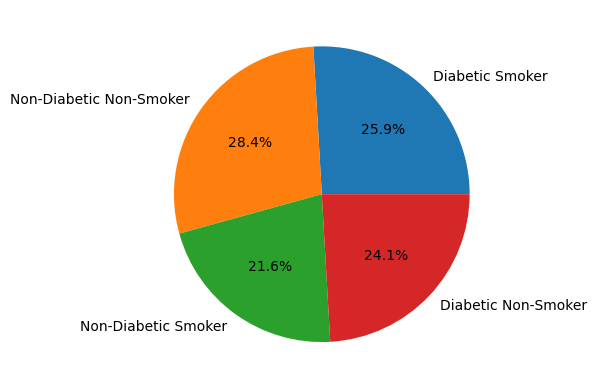

In [166]:
#Smoker Pie Chart
diabetic_smoker=smoker_df[(smoker_df["Diabetes Binary"] == 1.0) & (smoker_df["Smoker"] == 1.0)].count()
nondiabetic_nonsmoker = smoker_df[(smoker_df["Diabetes Binary"] == 0.0) & (smoker_df["Smoker"] == 0.0)].count()
nondiabetic_smoker = smoker_df[(smoker_df["Diabetes Binary"] == 0.0) & (smoker_df["Smoker"] == 1.0)].count()
diabetic_nonsmoker = smoker_df[(smoker_df["Diabetes Binary"] == 1.0) & (smoker_df["Smoker"] == 0.0)].count()
sizes = [diabetic_smoker[0], nondiabetic_nonsmoker[0],nondiabetic_smoker[0], diabetic_nonsmoker[0] ]
labels = ["Diabetic Smoker", "Non-Diabetic Non-Smoker", "Non-Diabetic Smoker","Diabetic Non-Smoker" ]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

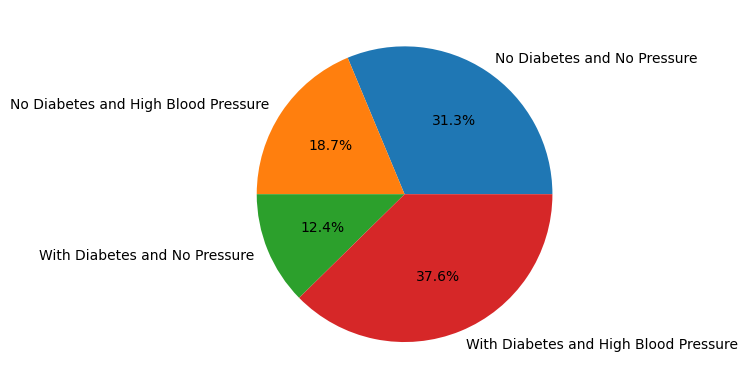

In [167]:
#Blood Pressure Pie Chart
Diabetes_and_blood_pressure = narrowed_df.iloc[:, [0, 1]]
D00=Diabetes_and_blood_pressure[(Diabetes_and_blood_pressure["Diabetes Binary"]==0) & (Diabetes_and_blood_pressure["Hi Blood Pressure"]==0) ].count()["Diabetes Binary"]
D01=Diabetes_and_blood_pressure[(Diabetes_and_blood_pressure["Diabetes Binary"]==0) & (Diabetes_and_blood_pressure["Hi Blood Pressure"]==1) ].count()["Diabetes Binary"]
D10=Diabetes_and_blood_pressure[(Diabetes_and_blood_pressure["Diabetes Binary"]==1) & (Diabetes_and_blood_pressure["Hi Blood Pressure"]==0) ].count()["Diabetes Binary"]
D11=Diabetes_and_blood_pressure[(Diabetes_and_blood_pressure["Diabetes Binary"]==1) & (Diabetes_and_blood_pressure["Hi Blood Pressure"]==1) ].count()["Diabetes Binary"]

#PIE CHart
sizes =[D00,D01,D10,D11]
labels=["No Diabetes and No Pressure", "No Diabetes and High Blood Pressure", "With Diabetes and No Pressure","With Diabetes and High Blood Pressure"]
fig, ax= plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

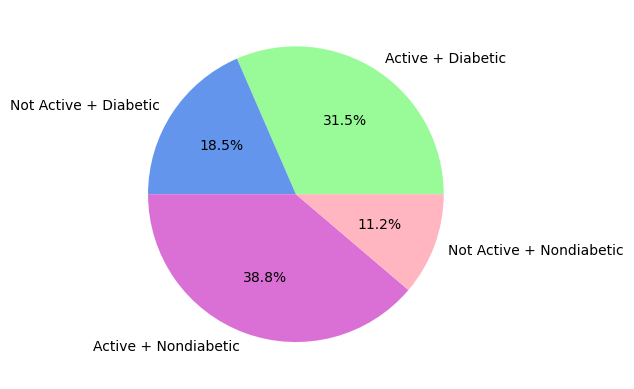

In [168]:
#Diabetic Pie Chart
active_diabetic = []
not_active_diabetic = []
active_nondiabetic = []
not_active_nondiabetic = []
for index, row in narrowed_df.iterrows():
    if narrowed_df.at[index, 'Activity'] == 0 and narrowed_df.at[index, 'Diabetes Binary'] == 0:
        not_active_nondiabetic.append(row['Activity'])
    elif narrowed_df.at[index, 'Activity'] == 0 and narrowed_df.at[index, 'Diabetes Binary'] == 1:
        not_active_diabetic.append(row['Activity'])
    elif narrowed_df.at[index, 'Activity'] == 1 and narrowed_df.at[index, 'Diabetes Binary'] == 0:
        active_nondiabetic.append(row['Activity'])
    else:
        active_diabetic.append(row['Activity'])
active_diabetic_pt = len(active_diabetic)
not_active_diabetic_pt = len(not_active_diabetic)
active_nondiabetic_pt = len(active_nondiabetic)
not_active_nondiabetic_pt = len(not_active_nondiabetic)
labels = ['Active + Diabetic', 'Not Active + Diabetic', 'Active + Nondiabetic', 'Not Active + Nondiabetic']
sizes = [active_diabetic_pt, not_active_diabetic_pt, active_nondiabetic_pt, not_active_nondiabetic_pt]
colors = ['palegreen', 'cornflowerblue', 'orchid', 'lightpink']
plt.pie(sizes, labels=labels, colors = colors, autopct = "%1.1f%%")
plt.show()

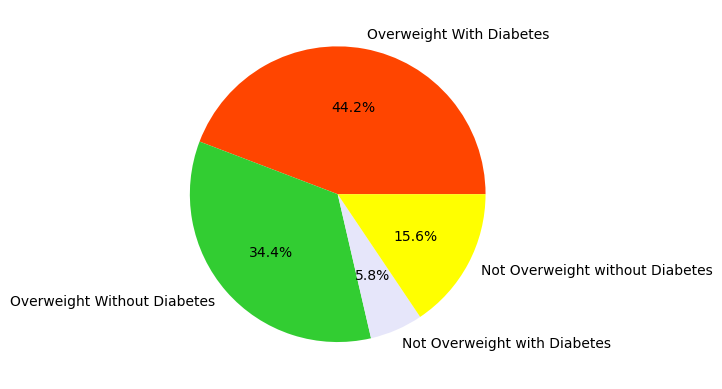

In [169]:
#Weight pie Chart
overweight_df = narrowed_df[narrowed_df['BMI_Binary']==1]
not_overweight_df = narrowed_df[narrowed_df['BMI_Binary'] == 0]
overweight_with_diabetes = overweight_df['Diabetes Binary'].sum()
overweight_without_diabetes = (overweight_df['Diabetes Binary'] == 0.0).sum()
not_overweight_with_diabetes = (not_overweight_df['Diabetes Binary'] == 1).sum()
not_overweight_without_diabetes = (not_overweight_df['Diabetes Binary'] == 0).sum()
labels = ['Overweight With Diabetes', 'Overweight Without Diabetes', 'Not Overweight with Diabetes', 'Not Overweight without Diabetes']
sizes = [overweight_with_diabetes, overweight_without_diabetes, not_overweight_with_diabetes, not_overweight_without_diabetes]
colors = ['orangered', 'limegreen', 'lavender', 'yellow']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

plt.show()

In [170]:
# STATISTICS TESTS

Q1 = narrowed_df['BMI'].quantile(0.25)
Q3 = narrowed_df['BMI'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (narrowed_df['BMI'] < lower_bound) | (narrowed_df['BMI'] > upper_bound)
print(outliers)

0        False
1        False
2        False
3        False
4        False
         ...  
70687    False
70688    False
70689    False
70690    False
70691    False
Name: BMI, Length: 70692, dtype: bool


In [214]:
bin_edges = [0, 19, 25, 29, 39, float('inf')]
bin_labels = ['<19', '19-25', '25-29', '30-39', '>40']
narrowed_df['BMI_Bins'] = pd.cut(narrowed_df['BMI'], bins=bin_edges, labels=bin_labels, right=False)

bmi_x=narrowed_df
#[narrowed_df["BMI"]<46]


BMI_dict = {
    "underweight": {"non-diabetic": [], "diabetic": [], "active": [], 'not-active': [], 'smoker': [], 'non-smoker': [], 'high_bp': [], 'reg_bp': []},
    "healthy": {"non-diabetic": [], "diabetic": [], "active": [], 'not-active': [], 'smoker': [], 'non-smoker': [], 'high_bp': [], 'reg_bp': []},
    "overweight": {"non-diabetic": [], "diabetic": [], "active": [], 'not-active': [], 'smoker': [], 'non-smoker': [], 'high_bp': [], 'reg_bp': []},
    "obese": {"non-diabetic": [], "diabetic": [], "active": [], 'not-active': [], 'smoker': [], 'non-smoker': [], 'high_bp': [], 'reg_bp': []},
    "extreme_obese": {"non-diabetic": [], "diabetic": [], "active": [], 'not-active': [], 'smoker': [], 'non-smoker': [], 'high_bp': [], 'reg_bp': []}
}
for index, row in bmi_x.iterrows():
    
    #DIABETIC LOOPS
    
    
    if (bmi_x.at[index, 'BMI_Bins'] == '<19') & (bmi_x.at[index, 'Diabetes Binary'] == 0):
        BMI_dict["underweight"]["non-diabetic"].append(row['BMI_Bins'])
    if (bmi_x.at[index, 'BMI_Bins'] == '<19') & (bmi_x.at[index, 'Diabetes Binary'] == 1):
        BMI_dict["underweight"]["diabetic"].append(row['BMI_Bins'])
    if (bmi_x.at[index, 'BMI_Bins'] == '19-25') & (bmi_x.at[index, 'Diabetes Binary'] == 0):
        BMI_dict["healthy"]["non-diabetic"].append(row['BMI_Bins'])
    if (bmi_x.at[index, 'BMI_Bins'] == '19-25') & (bmi_x.at[index, 'Diabetes Binary'] == 1):
        BMI_dict["healthy"]["diabetic"].append(row['BMI_Bins'])
    if (bmi_x.at[index, 'BMI_Bins'] == '25-29') & (bmi_x.at[index, 'Diabetes Binary'] == 0):
        BMI_dict["overweight"]["non-diabetic"].append(row['BMI_Bins'])
    if (bmi_x.at[index, 'BMI_Bins'] == '25-29') & (bmi_x.at[index, 'Diabetes Binary'] == 1):
        BMI_dict["overweight"]["diabetic"].append(row['BMI_Bins'])
    if (bmi_x.at[index, 'BMI_Bins'] == '30-39') & (bmi_x.at[index, 'Diabetes Binary'] == 0):
        BMI_dict["obese"]["non-diabetic"].append(row['BMI_Bins'])
    if (bmi_x.at[index, 'BMI_Bins'] == '30-39') & (bmi_x.at[index, 'Diabetes Binary'] == 1):
        BMI_dict["obese"]["diabetic"].append(row['BMI_Bins'])
    if (bmi_x.at[index, 'BMI_Bins'] == '>40') & (bmi_x.at[index, 'Diabetes Binary'] == 0):
        BMI_dict["extreme_obese"]["non-diabetic"].append(row['BMI_Bins'])
    if (bmi_x.at[index, 'BMI_Bins'] == '>40') & (bmi_x.at[index, 'Diabetes Binary'] == 1):
        BMI_dict["extreme_obese"]["diabetic"].append(row['BMI_Bins'])
    
    #ACTIVITY LOOPS
    
    if (bmi_x.at[index, 'BMI_Bins'] == '<19') & (bmi_x.at[index, 'Activity'] == 0):
        BMI_dict["underweight"]["not-active"].append(row['Activity'])
    if (bmi_x.at[index, 'BMI_Bins'] == '<19') & (bmi_x.at[index, 'Activity'] == 1):
        BMI_dict["underweight"]["active"].append(row['Activity'])
    if (bmi_x.at[index, 'BMI_Bins'] == '19-25') & (bmi_x.at[index, 'Activity'] == 0):
        BMI_dict["healthy"]["not-active"].append(row['Activity'])
    if (bmi_x.at[index, 'BMI_Bins'] == '19-25') & (bmi_x.at[index, 'Activity'] == 1):
        BMI_dict["healthy"]["active"].append(row['Activity'])
    if (bmi_x.at[index, 'BMI_Bins'] == '25-29') & (bmi_x.at[index, 'Activity'] == 0):
        BMI_dict["overweight"]["not-active"].append(row['Activity'])
    if (bmi_x.at[index, 'BMI_Bins'] == '25-29') & (bmi_x.at[index, 'Activity'] == 1):
        BMI_dict["overweight"]["active"].append(row['Activity'])
    if (bmi_x.at[index, 'BMI_Bins'] == '30-39') & (bmi_x.at[index, 'Activity'] == 0):
        BMI_dict["obese"]["not-active"].append(row['Activity'])
    if (bmi_x.at[index, 'BMI_Bins'] == '30-39') & (bmi_x.at[index, 'Activity'] == 1):
        BMI_dict["obese"]["active"].append(row['Activity'])
    if (bmi_x.at[index, 'BMI_Bins'] == '>40') & (bmi_x.at[index, 'Activity'] == 0):
        BMI_dict["extreme_obese"]["not-active"].append(row['Activity'])
    if (bmi_x.at[index, 'BMI_Bins'] == '>40') & (bmi_x.at[index, 'Activity'] == 1):
        BMI_dict["extreme_obese"]["active"].append(row['Activity'])
    
    #SMOKER LOOPS
    
    if (bmi_x.at[index, 'BMI_Bins'] == '<19') & (bmi_x.at[index, 'Smoker'] == 0):
        BMI_dict["underweight"]["non-smoker"].append(row['Smoker'])
    if (bmi_x.at[index, 'BMI_Bins'] == '<19') & (bmi_x.at[index, 'Smoker'] == 1):
        BMI_dict["underweight"]["smoker"].append(row['Smoker'])
    if (bmi_x.at[index, 'BMI_Bins'] == '19-25') & (bmi_x.at[index, 'Smoker'] == 0):
        BMI_dict["healthy"]["non-smoker"].append(row['Smoker'])
    if (bmi_x.at[index, 'BMI_Bins'] == '19-25') & (bmi_x.at[index, 'Smoker'] == 1):
        BMI_dict["healthy"]["smoker"].append(row['Smoker'])
    if (bmi_x.at[index, 'BMI_Bins'] == '25-29') & (bmi_x.at[index, 'Smoker'] == 0):
        BMI_dict["overweight"]["non-smoker"].append(row['Smoker'])
    if (bmi_x.at[index, 'BMI_Bins'] == '25-29') & (bmi_x.at[index, 'Smoker'] == 1):
        BMI_dict["overweight"]["smoker"].append(row['Smoker'])
    if (bmi_x.at[index, 'BMI_Bins'] == '30-39') & (bmi_x.at[index, 'Smoker'] == 0):
        BMI_dict["obese"]["non-smoker"].append(row['Smoker'])
    if (bmi_x.at[index, 'BMI_Bins'] == '30-39') & (bmi_x.at[index, 'Smoker'] == 1):
        BMI_dict["obese"]["smoker"].append(row['Smoker'])
    if (bmi_x.at[index, 'BMI_Bins'] == '>40') & (bmi_x.at[index, 'Smoker'] == 0):
        BMI_dict["extreme_obese"]["non-smoker"].append(row['Smoker'])
    if (bmi_x.at[index, 'BMI_Bins'] == '>40') & (bmi_x.at[index, 'Smoker'] == 1):
        BMI_dict["extreme_obese"]["smoker"].append(row['Smoker'])
        
    #BLOOD PRESSURE LOOPS
    if (bmi_x.at[index, 'BMI_Bins'] == '<19') & (bmi_x.at[index, 'Hi Blood Pressure'] == 0):
        BMI_dict["underweight"]["reg_bp"].append(row['Hi Blood Pressure'])
    if (bmi_x.at[index, 'BMI_Bins'] == '<19') & (bmi_x.at[index, 'Hi Blood Pressure'] == 1):
        BMI_dict["underweight"]["high_bp"].append(row['Hi Blood Pressure'])
    if (bmi_x.at[index, 'BMI_Bins'] == '19-25') & (bmi_x.at[index, 'Hi Blood Pressure'] == 0):
        BMI_dict["healthy"]["reg_bp"].append(row['Hi Blood Pressure'])
    if (bmi_x.at[index, 'BMI_Bins'] == '19-25') & (bmi_x.at[index, 'Hi Blood Pressure'] == 1):
        BMI_dict["healthy"]["high_bp"].append(row['Hi Blood Pressure'])
    if (bmi_x.at[index, 'BMI_Bins'] == '25-29') & (bmi_x.at[index, 'Hi Blood Pressure'] == 0):
        BMI_dict["overweight"]["reg_bp"].append(row['Hi Blood Pressure'])
    if (bmi_x.at[index, 'BMI_Bins'] == '25-29') & (bmi_x.at[index, 'Hi Blood Pressure'] == 1):
        BMI_dict["overweight"]["high_bp"].append(row['Hi Blood Pressure'])
    if (bmi_x.at[index, 'BMI_Bins'] == '30-39') & (bmi_x.at[index, 'Hi Blood Pressure'] == 0):
        BMI_dict["obese"]["reg_bp"].append(row['Hi Blood Pressure'])
    if (bmi_x.at[index, 'BMI_Bins'] == '30-39') & (bmi_x.at[index, 'Hi Blood Pressure'] == 1):
        BMI_dict["obese"]["high_bp"].append(row['Hi Blood Pressure'])
    if (bmi_x.at[index, 'BMI_Bins'] == '>40') & (bmi_x.at[index, 'Hi Blood Pressure'] == 0):
        BMI_dict["extreme_obese"]["reg_bp"].append(row['Hi Blood Pressure'])
    if (bmi_x.at[index, 'BMI_Bins'] == '>40') & (bmi_x.at[index, 'Hi Blood Pressure'] == 1):
        BMI_dict["extreme_obese"]["high_bp"].append(row['Hi Blood Pressure'])
# function making one bar on a bar chart
def make_bar_chart(x,y):
    plt.bar(x,y)

Diabetic 169
Non-Diabetic 484
Active 459
Not Active 194
Smoker 331
Non-Smoker 322
High Blood Pressure 238
Normal Blood Pressure 415


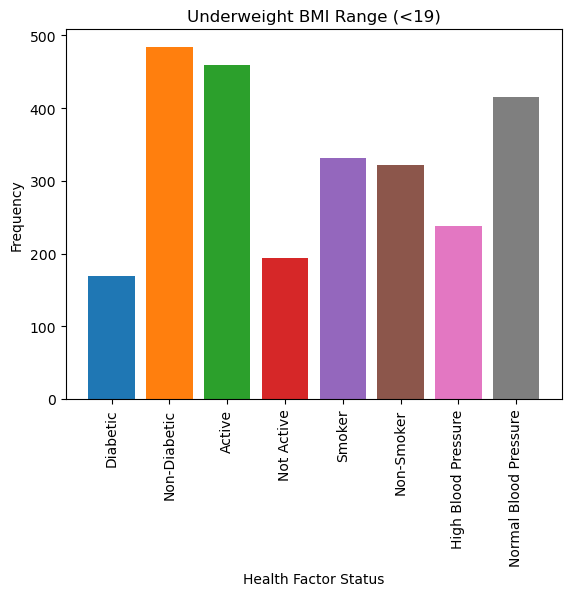

In [215]:
#UNDERWEIGHT BAR CHART


categories = [
                ["Diabetic", len(BMI_dict['underweight']['diabetic'])],
                ["Non-Diabetic", len(BMI_dict['underweight']['non-diabetic'])],
                ["Active", len(BMI_dict['underweight']['active'])],
                ["Not Active", len(BMI_dict['underweight']['not-active'])],
                ['Smoker', len(BMI_dict['underweight']['smoker'])],
                ['Non-Smoker', len(BMI_dict['underweight']['non-smoker'])],
                ['High Blood Pressure', len(BMI_dict['underweight']['high_bp'])],
                ['Normal Blood Pressure',len(BMI_dict['underweight']['reg_bp'])]
    
             ]

for category in categories:
    make_bar_chart(category[0], category[1])
    print(category[0], category[1])
# creates labels and titles for the bar chart
plt.xlabel('Health Factor Status')
plt.ylabel('Frequency')
plt.title('Underweight BMI Range (<19)')
plt.xticks(rotation = 90)
plt.show()


Diabetic 3928
Non-Diabetic 10532
Active 11520
Not Active 2940
Smoker 6478
Non-Smoker 7982
High Blood Pressure 5139
Normal Blood Pressure 9321


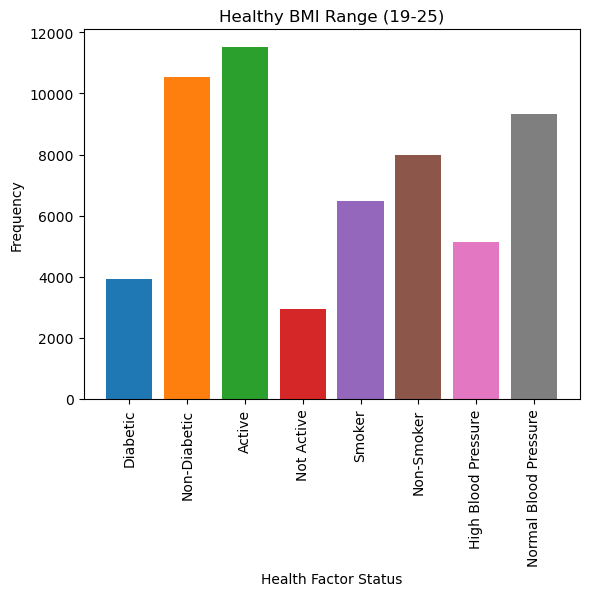

In [216]:
#HEALTHY BAR CHART

categories = [
                ["Diabetic", len(BMI_dict['healthy']['diabetic'])],
                ["Non-Diabetic", len(BMI_dict['healthy']['non-diabetic'])],
                ["Active", len(BMI_dict['healthy']['active'])],
                ["Not Active", len(BMI_dict['healthy']['not-active'])],
                ['Smoker', len(BMI_dict['healthy']['smoker'])],
                ['Non-Smoker', len(BMI_dict['healthy']['non-smoker'])],
                ['High Blood Pressure', len(BMI_dict['healthy']['high_bp'])],
                ['Normal Blood Pressure',len(BMI_dict['healthy']['reg_bp'])]
    
             ]


for category in categories:
    make_bar_chart(category[0], category[1])
    print(category[0], category[1])
# creates labels and titles for the bar chart
plt.xlabel('Health Factor Status')
plt.ylabel('Frequency')
plt.title('Healthy BMI Range (19-25)')
plt.xticks(rotation=90)
plt.show()

Diabetic 8461
Non-Diabetic 11455
Active 14924
Not Active 4992
Smoker 9417
Non-Smoker 10499
High Blood Pressure 10268
Normal Blood Pressure 9648


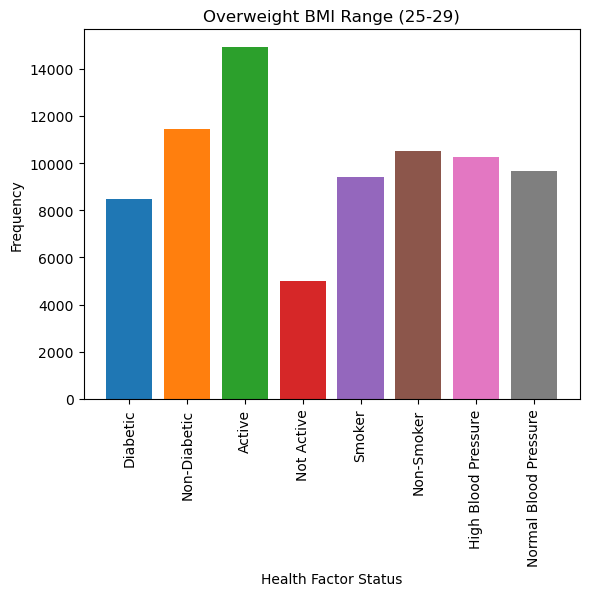

In [217]:
#OVERWEIGHT BAR CHART

categories = [
                ["Diabetic", len(BMI_dict['overweight']['diabetic'])],
                ["Non-Diabetic", len(BMI_dict['overweight']['non-diabetic'])],
                ["Active", len(BMI_dict['overweight']['active'])],
                ["Not Active", len(BMI_dict['overweight']['not-active'])],
                ['Smoker', len(BMI_dict['overweight']['smoker'])],
                ['Non-Smoker', len(BMI_dict['overweight']['non-smoker'])],
                ['High Blood Pressure', len(BMI_dict['overweight']['high_bp'])],
                ['Normal Blood Pressure',len(BMI_dict['overweight']['reg_bp'])]
    
             ]

# goes through each item in categories list and calls the make_bar_chart function for each item in that list
# completed visual should have 4 additional bars - smoker, non smoker, high bp, reg bp
for category in categories:
    make_bar_chart(category[0], category[1])
    print(category[0], category[1])
# creates labels and titles for the bar chart
plt.xlabel('Health Factor Status')
plt.ylabel('Frequency')
plt.title('Overweight BMI Range (25-29)')

plt.xticks(rotation = 90)
plt.show()


Diabetic 17326
Non-Diabetic 11117
Active 18957
Not Active 9486
Smoker 13976
Non-Smoker 14467
High Blood Pressure 18676
Normal Blood Pressure 9767


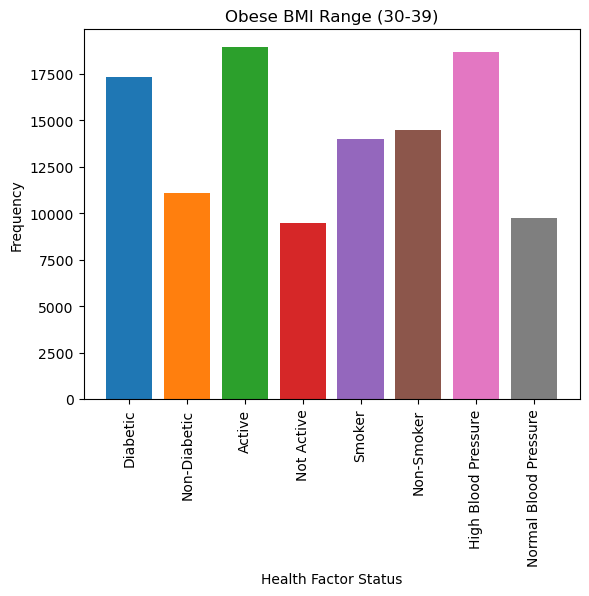

In [218]:
#OBESE BAR CHART
# list containing the labels for x value categories and length of lists from BMI_dict for the y_value counts

categories = [
                ["Diabetic", len(BMI_dict['obese']['diabetic'])],
                ["Non-Diabetic", len(BMI_dict['obese']['non-diabetic'])],
                ["Active", len(BMI_dict['obese']['active'])],
                ["Not Active", len(BMI_dict['obese']['not-active'])],
                ['Smoker', len(BMI_dict['obese']['smoker'])],
                ['Non-Smoker', len(BMI_dict['obese']['non-smoker'])],
                ['High Blood Pressure', len(BMI_dict['obese']['high_bp'])],
                ['Normal Blood Pressure',len(BMI_dict['obese']['reg_bp'])]
    
             ]
# goes through each item in categories list and calls the make_bar_chart function for each item in that list
# completed visual should have 4 additional bars - smoker, non smoker, high bp, reg bp
for category in categories:
    make_bar_chart(category[0], category[1])
    print(category[0], category[1])
# creates labels and titles for the bar chart
plt.xlabel('Health Factor Status')
plt.ylabel('Frequency')
plt.title('Obese BMI Range (30-39)')

plt.xticks(rotation = 90)
plt.show()

Diabetic 5462
Non-Diabetic 1758
Active 3839
Not Active 3381
Smoker 3396
Non-Smoker 3824
High Blood Pressure 5511
Normal Blood Pressure 1709


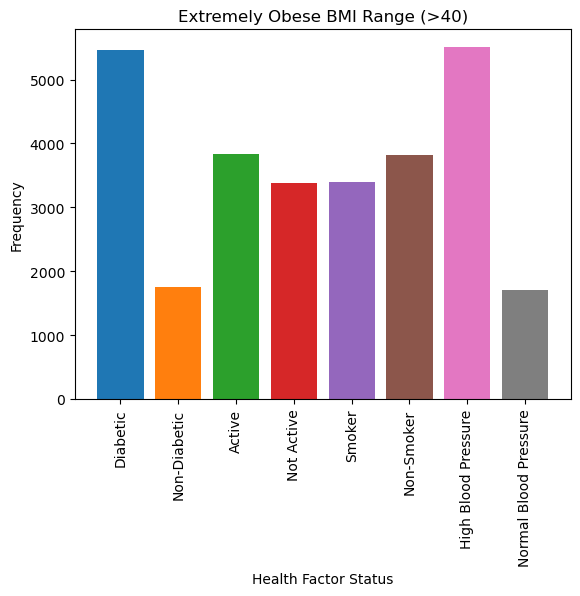

In [219]:
#EXTREMELY OBESE BAR CHART

categories = [
                ["Diabetic", len(BMI_dict['extreme_obese']['diabetic'])],
                ["Non-Diabetic", len(BMI_dict['extreme_obese']['non-diabetic'])],
                ["Active", len(BMI_dict['extreme_obese']['active'])],
                ["Not Active", len(BMI_dict['extreme_obese']['not-active'])],
                ['Smoker', len(BMI_dict['extreme_obese']['smoker'])],
                ['Non-Smoker', len(BMI_dict['extreme_obese']['non-smoker'])],
                ['High Blood Pressure', len(BMI_dict['extreme_obese']['high_bp'])],
                ['Normal Blood Pressure',len(BMI_dict['extreme_obese']['reg_bp'])]
    
             ]
# goes through each item in categories list and calls the make_bar_chart function for each item in that list
# completed visual should have 4 additional bars - smoker, non smoker, high bp, reg bp
for category in categories:
    make_bar_chart(category[0], category[1])
    print(category[0], category[1])
# creates labels and titles for the bar chart

plt.xlabel('Health Factor Status')
plt.ylabel('Frequency')
plt.title('Extremely Obese BMI Range (>40)')
plt.xticks(rotation = 90)
plt.show()

In [220]:
#Pearson Correlation Values
matrix_df = narrowed_df
c = ["Diabetes Binary",'Hi Blood Pressure', 'Smoker', 'Activity', 'BMI']
matrix_df = matrix_df[c]
correlation_matrix = matrix_df.corr()
diabetes_correlation = correlation_matrix["Diabetes Binary"]
index_list = ["Hi Blood Pressure", "Smoker", "Activity", "BMI"]
diabetes_correlation

Diabetes Binary      1.000000
Hi Blood Pressure    0.381516
Smoker               0.085999
Activity            -0.158666
BMI                  0.293373
Name: Diabetes Binary, dtype: float64

In [221]:
x_values = index_list
y_values = [diabetes_correlation[1], diabetes_correlation[2], diabetes_correlation[3], diabetes_correlation[4]]

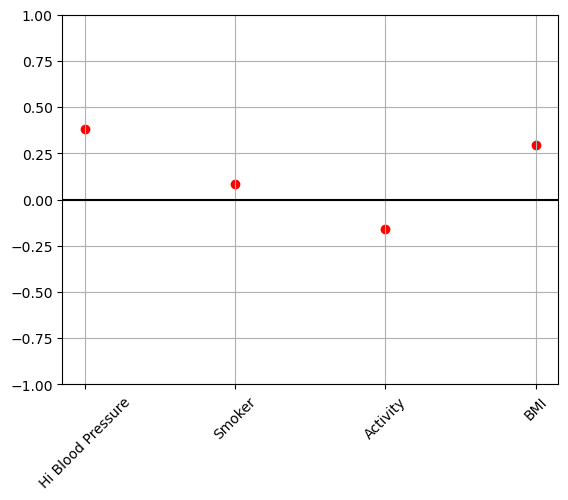

In [222]:
plt.scatter(x_values, y_values, facecolors = 'r')
plt.xticks(rotation=45)
plt.grid()
plt.axhline(0, color='black')
plt.ylim(-1, 1)

plt.show()